In [1]:
from diffusers import DiffusionPipeline
import torch
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

/home/shu/anaconda3/envs/conference/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

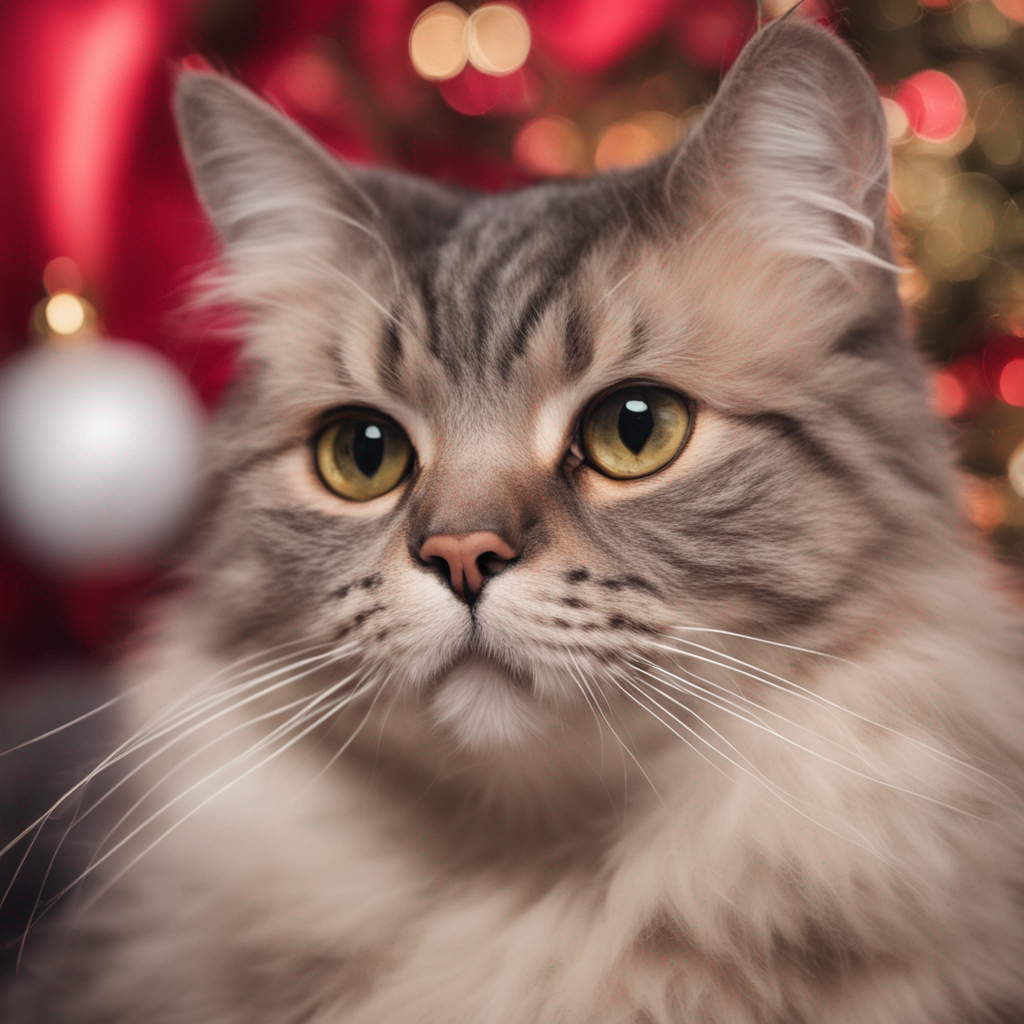

In [27]:
prompt = "cat headshot photo style, christmas background"

image = base(
    prompt=prompt,
    num_inference_steps=40,
    denoising_end=0.8,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=40,
    denoising_start=0.8,
    image=image,
).images[0]
image

In [1]:
from src.models import build_stable_diffusion
sd = build_stable_diffusion("stabilityai/stable-diffusion-xl-base-1.0",None,'clip','euler_discrete',True,None,'fp16','cuda:0')


TypeError: get_ldm_model() takes 5 positional arguments but 6 were given

In [3]:
from diffusers import DiffusionPipeline
import torch

base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    text_encoder = sd[4][0],
    text_encoder_2 = sd[4][1],
    vae = sd[0],
    unet = sd[1],
    tokenizer = sd[3][0],
    tokenizer_2 = sd[3][1],
    torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
for key,value in base.unet.state_dict().items():
    print(value.dtype)
    break

torch.float32
